## Utility functions

In [104]:
import glob
import json
import random

In [105]:
def get_data(image_path, annotations_path, sample_size, datatype = 'train'):
    
    random.seed(123)
    
    # Get paths of individual images
    images_path = glob.glob(f"{image_path}/{datatype}2014/*")
    
    # Extract a list of all images that includes human
    with open(f'{annotations_path}/instances_{datatype}2014.json') as f:
      instances_json = json.load(f)
    image_category_dict = dict()
    for i in range(len(instances_json['annotations'])):
        cat_id = instances_json['annotations'][i]['category_id']
        image_id = instances_json['annotations'][i]['image_id']
        #To exclude crowd
        #if instances_json['annotations'][i]['is_crowd'] == 0:
        if cat_id in image_category_dict:
            image_category_dict[cat_id] += [image_id]
        else:
            image_category_dict[cat_id] = [image_id]
    human_image_ids = set(image_category_dict[1]) #human images are of category 1, remove duplicates
    
    # Select sample out of all human images
    training_image_ids = random.sample(human_image_ids, sample_size)
    
    # Build dictionaries to map image ids to filenames and captions to images
    with open(f'{annotations_path}/captions_{datatype}2014.json') as f:
      captions_json = json.load(f)

    image_id_dict = dict()
    # key = image_id, value = image_fname
    for i in range(len(captions_json['images'])):
        image_id = captions_json['images'][i]['id']
        image_fname = captions_json['images'][i]['file_name']
        image_id_dict[image_id] = image_fname

    captions_dict = dict()
    # key = image_id, value = list of captions
    for i in range(len(captions_json['annotations'])):
        image_id = captions_json['annotations'][i]['image_id']
        caption = captions_json['annotations'][i]['caption']
        if image_id in training_image_ids and image_id in captions_dict:
            captions_dict[image_id] += [caption]
        elif image_id in training_image_ids:
            captions_dict[image_id] = [caption]
            
    return training_image_ids, images_path, image_id_dict, captions_dict

In [133]:
image_path = './data/images/'
annotations_path = './data/annotations/'
sample_size = 100
training_image_ids, images_path, image_id_dict, captions_dict = get_data(image_path, annotations_path, sample_size)

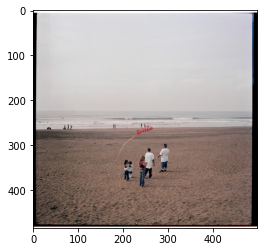

['A family flies a fish kite at the beach.', 'A group of youngsters fly a kite on a sandy beach by the ocean.', 'A family on the beach with a finding nemo kite.', 'There are some people walking with a clown fish kite', 'Several people that are on a beach in the day time.']


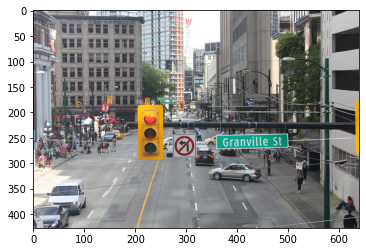

['Crowded city street bustling with people and cars', 'a traffic light and a street sign above a city road', 'Street light on Granville street showing a red light.', 'A stop light is next to a street sign in the city.', 'A yellow traffic light hanging over a city street.']


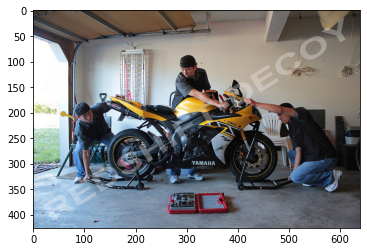

['some men are working on a yellow black and white motorcycle', 'Three guys work on a Yamaha racing motorcycle', 'A motorcycle being examined by three men in a garage.', 'Three men work on motorcycle in a garage.', 'THREE MEN IN A GARAGE LOOKING OVER A MOTORCYCLE']


In [138]:
###### Example of selected captions
import matplotlib.pyplot as plt

egs = [28868, 56664, 38663]
for eg in egs:
    img = plt.imread(image_path + "train2014/"+ image_id_dict[eg])
    plt.imshow(img)
    plt.show()
    print(captions_dict[eg])

Will we want to exclude "crowds"?